# Migration Social Network Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [ ]:
import pandas as pd

In [4]:
from src.network import build_year_migration_network, report_G_info, get_G_info, get_top_values, visualise_graph, create_subgraph

In [5]:
migration_df = pd.read_csv("../data/migration_bilateral.csv")
migration_df = migration_df.drop(columns=["inflow", "outflow"])
migration_df

,iso_or,origin,iso_des,destination,year,stock,flow
0,AAB,Antigua and Barbuda,ABW,Aruba,1960,16,NaN
1,AAB,Antigua and Barbuda,ABW,Aruba,1961,16,0.0
2,AAB,Antigua and Barbuda,ABW,Aruba,1962,15,-1.0
3,AAB,Antigua and Barbuda,ABW,Aruba,1963,15,0.0
4,AAB,Antigua and Barbuda,ABW,Aruba,1964,15,0.0
...,...,...,...,...,...,...,...
2889683,ZIM,Zimbabwe,ZAM,Zambia,2016,13239,150.0
2889684,ZIM,Zimbabwe,ZAM,Zambia,2017,13782,629.0
2889685,ZIM,Zimbabwe,ZAM,Zambia,2018,14670,976.0
2889686,ZIM,Zimbabwe,ZAM,Zambia,2019,15720,1142.0


## Sample analysis of the migration social network for 2011

In [6]:
g = build_year_migration_network(migration_df, 2011)

In [7]:
info = get_G_info(g)

In [8]:
report_G_info(info)

node_num: 236
edge_num: 42305
density: 0.7628020194734945
reciprocity: 0.9578396890040726
diameter: inf
weak_component_num: 1
strong_component_num: 9


In [9]:
top_in_degrees = get_top_values(info["in_degrees"], 10)
top_in_degrees

[('USA', 44296929),
 ('RUS', 11299535),
 ('GMY', 11269091),
 ('SAU', 9104314),
 ('UAE', 7578348),
 ('FRN', 7413316),
 ('UKG', 7318698),
 ('CND', 6954116),
 ('SPN', 6343589),
 ('AUL', 6212863)]

USA, Russia, Germany, Saudi Arabia, United Arab Emirates, France, United Kingdom, Canada, Spain, Australia, are the countries with the highest number of incoming migrants.

In [10]:
top_out_degrees = get_top_values(info["out_degrees"], 10)
top_out_degrees

[('IND', 13920086),
 ('MEX', 12511665),
 ('RUS', 10144786),
 ('CHN', 9065008),
 ('BNG', 6594830),
 ('UKR', 5503267),
 ('AFG', 5380606),
 ('PAK', 5049536),
 ('PHI', 4882991),
 ('UKG', 4362110)]

India, Mexico, Russia, China, Bangladesh, Ukraine, Afghanistan, Pakistan, Philipines, United Kingdom, have the highest number of outgoing migrants.

In [11]:
top_betweenness = get_top_values(info["betweenness"], 10)
top_betweenness

[('USA', 0.010044164655638498),
 ('FRN', 0.00953860781878708),
 ('UKG', 0.009414952157350252),
 ('AUL', 0.008897019968798806),
 ('CND', 0.007480996876873246),
 ('NTH', 0.0070214562202433025),
 ('NOR', 0.00519464762495205),
 ('ITA', 0.004848068149137334),
 ('ICE', 0.004201243346867181),
 ('DOM', 0.0041958193129206945)]

USA, France, United Kingdom, Australia, Canada, The Netherlands, Norway, Italy, Iceland, Dominican Republic, seem to have the highest betweenness centrality. 

That means these countries are key hubs in this graph (critical transit countries in global migration flows). These countries act as important bridges or gatekeepers within the global migration network.

In [12]:
top_clusteringcoeffs = get_top_values(info["clustering_coefficients"], 20)
top_clusteringcoeffs

[('CZE', 1.0),
 ('NAU', 1.0),
 ('SCG', 1.0),
 ('YUG', 1.0),
 ('SPM', 1.0),
 ('GIB', 1.0),
 ('VAT', 1.0),
 ('TKL', 1.0),
 ('SUN', 1.0),
 ('TAW', 1.0),
 ('ESH', 1.0),
 ('BOT', 0.9978556023919224),
 ('SIE', 0.9978556023919224),
 ('HON', 0.9978556023919224),
 ('GNB', 0.9978556023919224),
 ('NIR', 0.9978556023919224),
 ('BMU', 0.9978556023919224),
 ('CDI', 0.9978556023919224),
 ('CAM', 0.9978556023919224),
 ('GAM', 0.9978556023919224)]

Gibraltar, Saint Pierre and Miquelon, Czechia, Taiwan, Former Soviet Union, Vatican City, Tokelau, Serbia and Montenegro, Yugoslavia, Nauru, Western Sahara seem to have the highest clustering coefficients.

A high clustering coefficient for a particular country in a migration network suggests that the set of countries it is directly connected to (the countries sending migrants to it or receiving migrants from it) also tend to be interconnected with each other. So, its neighborhood forms a tightly knit group.

In the context of migration, such a cluster might reflect a regional bloc ( countries that are geographically close and frequently exchange migrants) or a group of countries that share cultural, historical, or linguistic ties. A high clustering coefficient could indicate the presence of a tightly interwoven sub-network of countries with strong mutual migration patterns.

### Example of a subgraph and how it looks like visualised

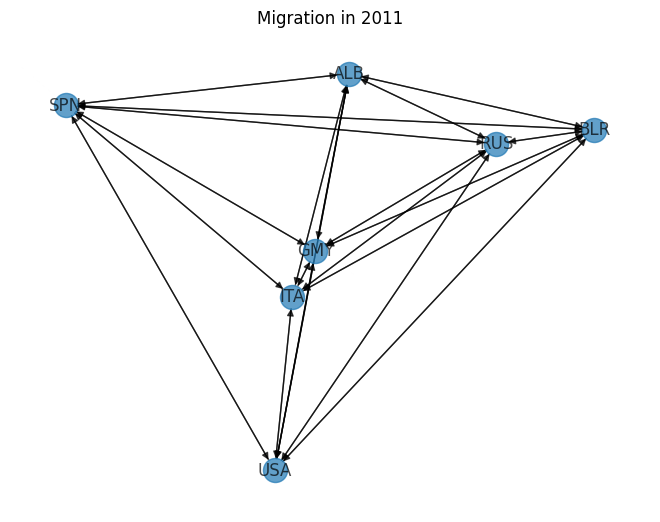

In [13]:
subgraph = create_subgraph(g, ['ALB', 'BLR', 'GMY', 'USA', 'CHE', 'AUT', 'ITA', 'GBK', 'RUS', 'SPN'])
visualise_graph(subgraph)

## Analyse the full social network and see how the main nodes change through out the years

In [14]:
from src.network import build_full_migration_network, get_full_info

In [15]:
G = build_full_migration_network(migration_df)

In [ ]:
info_full = get_full_info(G)

### Plot centralities as animations through years

In [17]:
from src.network import plot_bar, get_animation

MovieWriter ffmpeg unavailable; using Pillow instead.


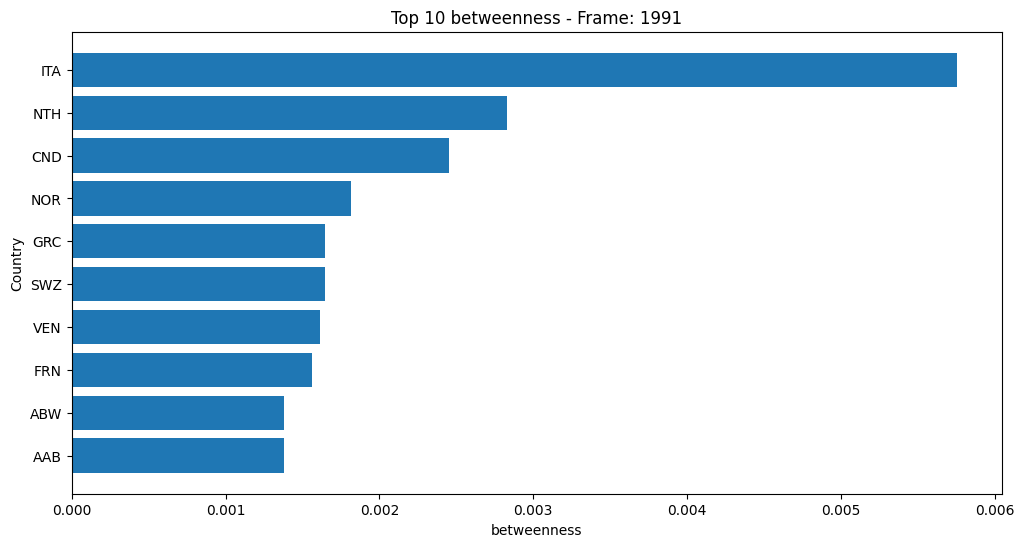

In [21]:
an = get_animation(info_full)
an.save("../gifs/top_betweenness.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


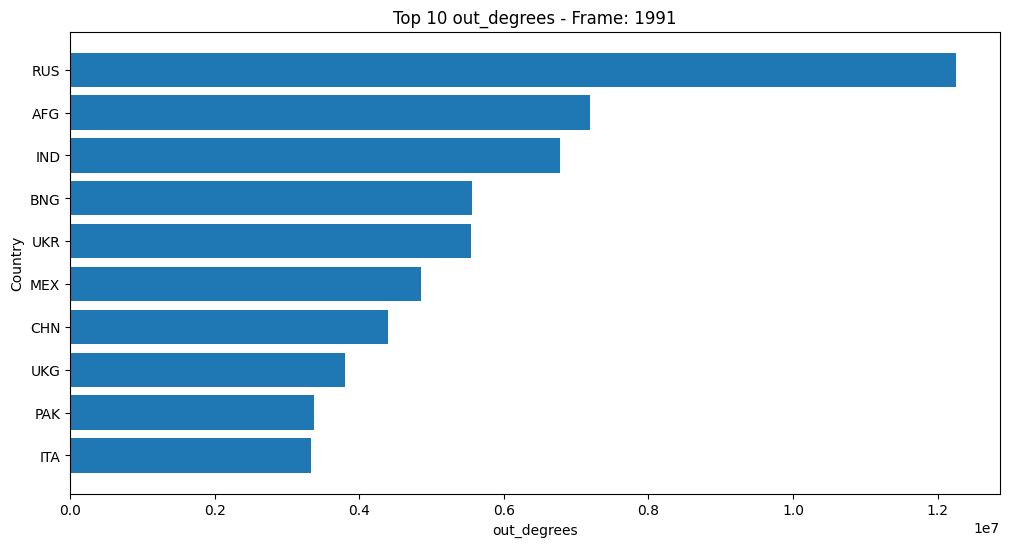

In [22]:
an_out = get_animation(info_full, measure="out_degrees")
an_out.save("../gifs/out_degrees.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


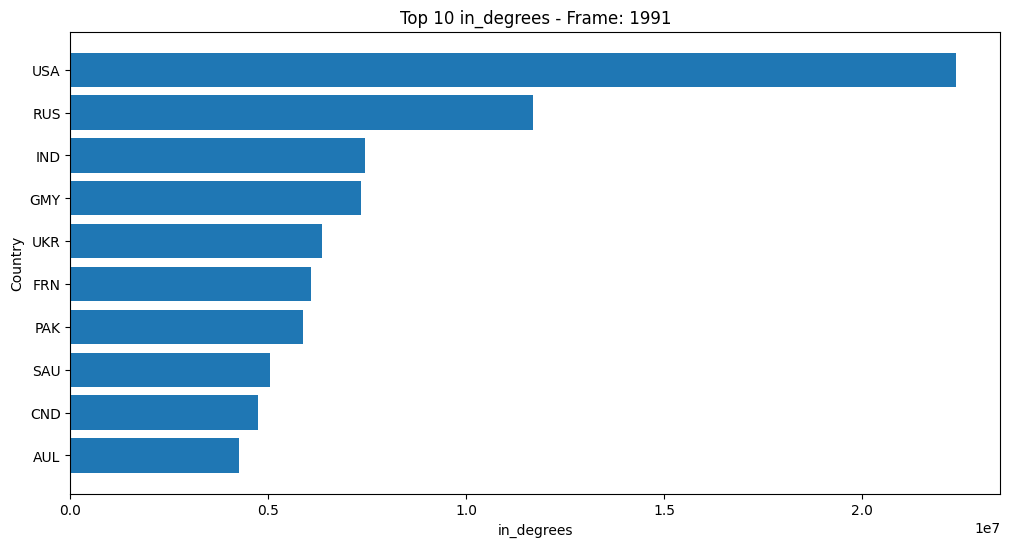

In [26]:
an_in = get_animation(info_full, measure="in_degrees")
an_in.save("../gifs/in_degrees.gif")